In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Dataset
dataset=pd.read_csv('oasis_longitudinal.csv')
dataset

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
dataset.describe()


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
#preprocessing of dataset to convert categorical to numerical
#Target variable
dataset['Group'] = dataset['Group'].replace(['Converted'], ['Demented']) 


In [6]:
#converting target variable and gender to numerical values
obj1=LabelEncoder()
obj2=LabelEncoder()
dataset['Target']=obj1.fit_transform(dataset['Group'])
dataset['Gender']=obj2.fit_transform(dataset['M/F'])
dataset.drop(['Subject ID','MRI ID','Group','M/F','Hand'],axis=1,inplace=True)
dataset
    

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Target,Gender
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1,1
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,1,1
2,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,0,1
3,2,560,76,12,NaN,28.0,0.5,1738,0.713,1.010,0,1
4,3,1895,80,12,NaN,22.0,0.5,1698,0.701,1.034,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,82,16,1.0,28.0,0.5,1693,0.694,1.037,0,1
369,3,2297,86,16,1.0,26.0,0.5,1688,0.675,1.040,0,1
370,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,1,0
371,2,763,63,13,2.0,30.0,0.0,1327,0.796,1.323,1,0


C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


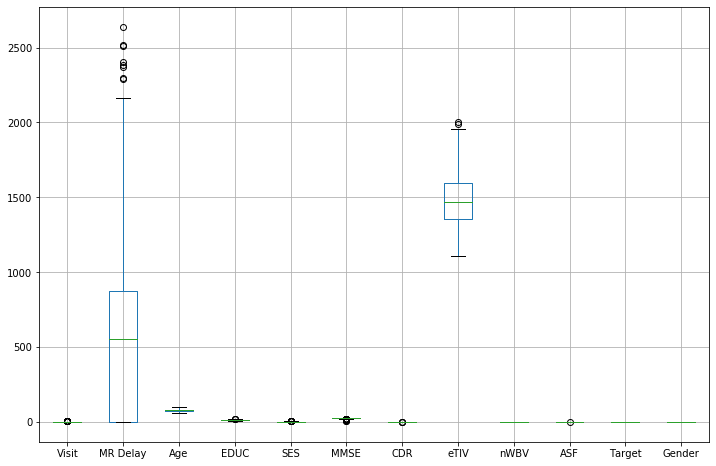

In [7]:
#Outlier Detection
plt.figure(figsize=(12,8))
lst=list(dataset.columns.values)
dataset.boxplot(lst)
plt.show()


In [8]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
IQR #IQR values for each column

Visit         1.000
MR Delay    873.000
Age          11.000
EDUC          4.000
SES           1.000
MMSE          3.000
CDR           0.500
eTIV        240.000
nWBV          0.056
ASF           0.194
Target        1.000
Gender        1.000
dtype: float64

In [9]:
#Outlier Removal
dataset=dataset[~((dataset< (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Target,Gender
2,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,0,1
3,2,560,76,12,NaN,28.0,0.5,1738,0.713,1.010,0,1
5,1,0,88,18,3.0,28.0,0.0,1215,0.710,1.444,1,0
6,2,538,90,18,3.0,27.0,0.0,1200,0.718,1.462,1,0
7,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
367,1,0,80,16,1.0,28.0,0.5,1704,0.711,1.030,0,1
368,2,842,82,16,1.0,28.0,0.5,1693,0.694,1.037,0,1
370,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,1,0
371,2,763,63,13,2.0,30.0,0.0,1327,0.796,1.323,1,0


In [10]:
#Splitting Dataset into Train and Test Set
op=dataset['Target']
dataset=dataset.drop(['Target'],axis=1)
ip=dataset


In [11]:
ip_train,ip_test,op_train,op_test=train_test_split(ip,op,test_size=0.2,random_state=2)

In [12]:
ip_train.shape,ip_test.shape,op_train.shape,op_test.shape


((239, 11), (60, 11), (239,), (60,))

In [13]:
#Data Preprocessing -------training set
ip_train.isnull().sum()

Visit        0
MR Delay     0
Age          0
EDUC         0
SES         11
MMSE         1
CDR          0
eTIV         0
nWBV         0
ASF          0
Gender       0
dtype: int64

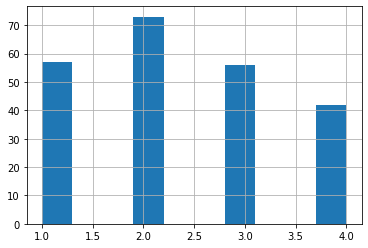

In [14]:
ip_train['SES'].hist() #normal distribution

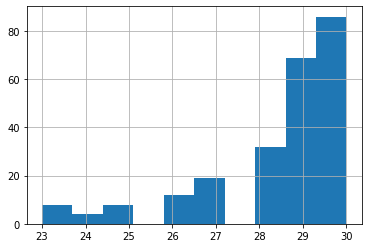

In [15]:
ip_train['MMSE'].hist()#left skewed distribution

In [16]:
#Values for imputation
ses_mean=ip_train['SES'].mean() 
mmse_median=ip_train['MMSE'].median() 

In [17]:
#Imputing values to SES,MMSE features
ip_train.fillna({x:ses_mean for x in ['SES']},inplace=True)
ip_train.fillna({x:mmse_median for x in ['MMSE']},inplace=True)


C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
ip_train.isnull().sum() #no null values present in training set

Visit       0
MR Delay    0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
Gender      0
dtype: int64

# Decision Tree-CART Algorithm

In [19]:
#Training Model
model=DecisionTreeClassifier(criterion="gini")
model.fit(ip_train,op_train)

DecisionTreeClassifier()

In [20]:
model.score(ip_train,op_train)

1.0

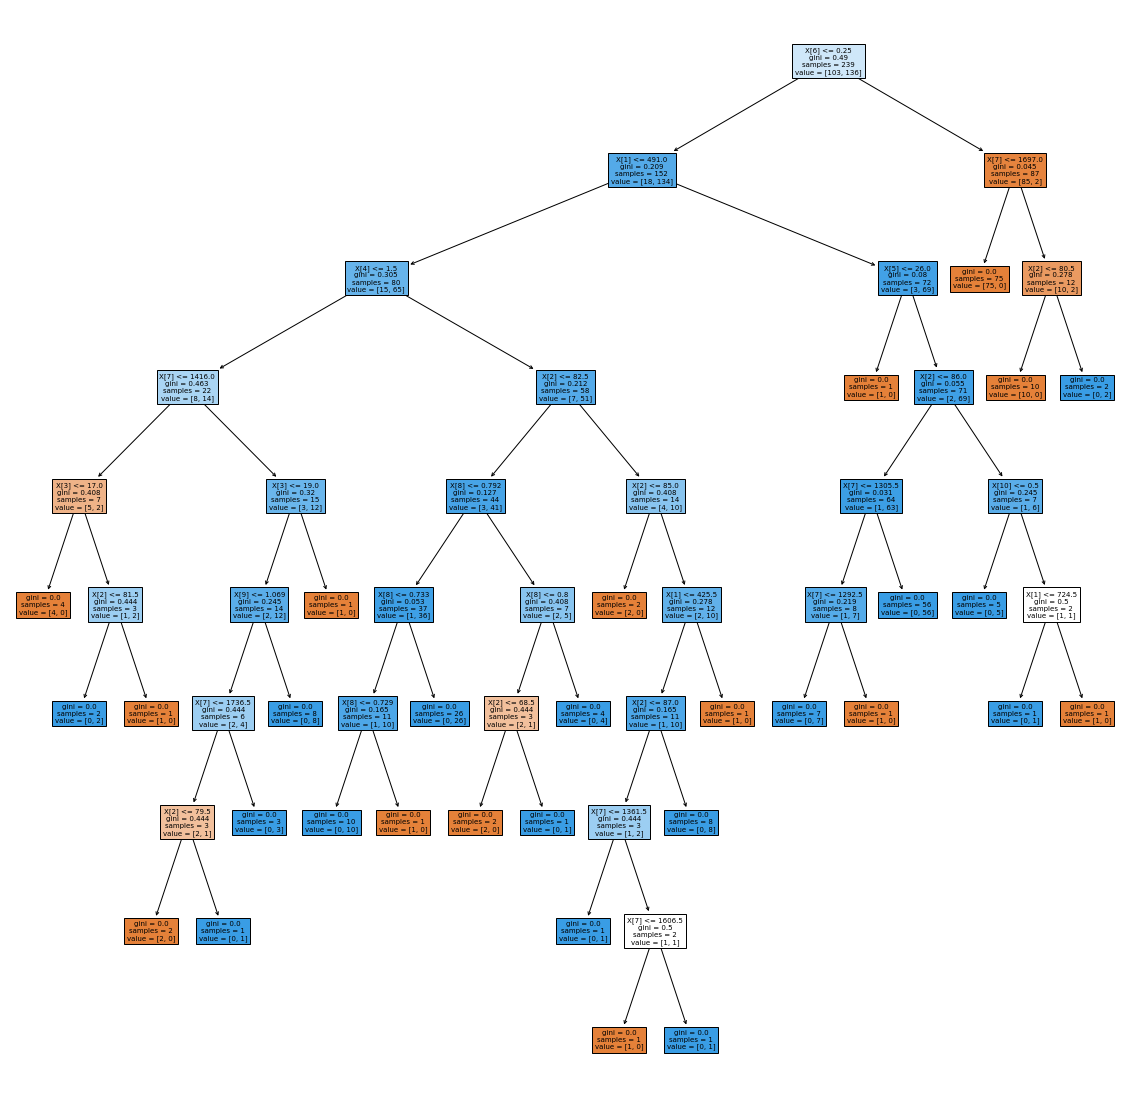

In [21]:
#Plotting Decision Tree
plt.figure(figsize=(20,20))
plot_tree(model,filled=True)
plt.show()
# plt.savefig("decision_tree.png")

In [22]:
#preprocessing test set to make predictions
ip_test.isnull().sum()

Visit       0
MR Delay    0
Age         0
EDUC        0
SES         5
MMSE        1
CDR         0
eTIV        0
nWBV        0
ASF         0
Gender      0
dtype: int64

In [23]:
#Imputation performed on test set
ip_test.fillna({x:ses_mean for x in ['SES']},inplace=True)
ip_test.fillna({x:mmse_median for x in ['MMSE']},inplace=True)


C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [24]:
ip_test.isnull().sum()#no NULL values present in test data, hence make predictions

Visit       0
MR Delay    0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
Gender      0
dtype: int64

In [25]:
#making predictions
pred=model.predict(ip_test)

In [26]:
accuracy=accuracy_score(op_test,pred)*100
print(f"Model Accuracy using CART(gini index) is: {round(accuracy,2)}%")

Model Accuracy using CART(gini index) is: 95.0%


In [27]:
confusion_matrix(op_test,pred)

array([[28,  0],
       [ 3, 29]], dtype=int64)

# Decision Tree-ID3 Algorithm

In [28]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(ip_train,op_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
model.score(ip_train,op_train)

1.0

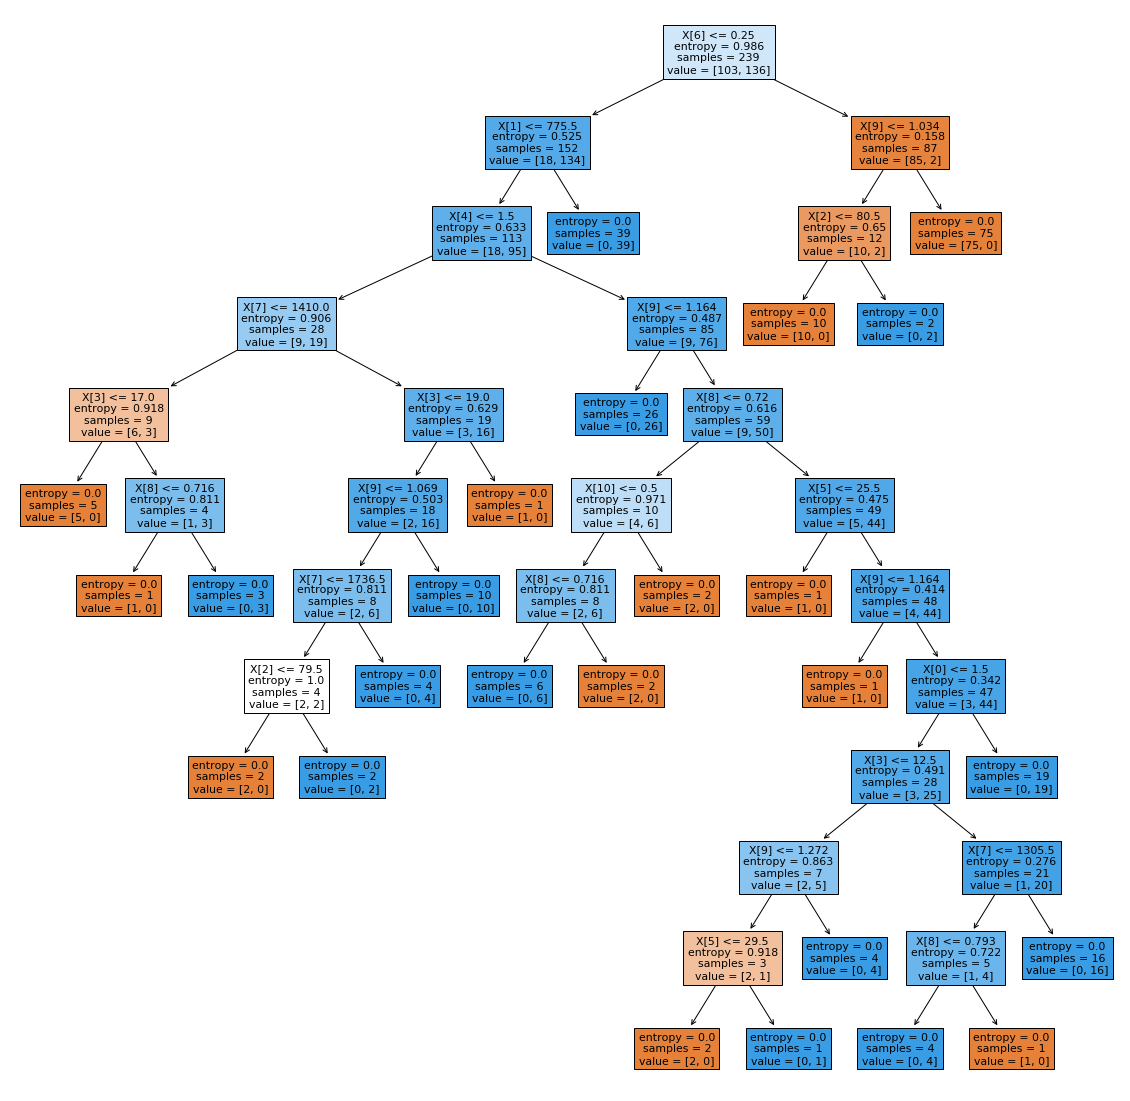

In [30]:
#Plotting Decision Tree
plt.figure(figsize=(20,20))
plot_tree(model,filled=True)
plt.show()
# plt.savefig("decision_tree.png")

In [31]:
#making predictions
id3_pred=model.predict(ip_test)
accuracy=accuracy_score(op_test,id3_pred)*100
print(f"Model Accuracy ID3(entropy) is: {round(accuracy,2)}%")

Model Accuracy ID3(entropy) is: 93.33%


In [32]:
confusion_matrix(op_test,pred)

array([[28,  0],
       [ 3, 29]], dtype=int64)